# 4 cross-section extraction
## 4.I moving from 6D analysis to 2$\times$3D

In [3]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [4]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/Xsec_extraction/'

In [6]:
versions['overlay date'] = '2018_09_22'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_genie_CC1p.csv and found the file...
9538 selected CC1p events overlay


## events in 6D bins

In [20]:
def get_sam_in_bin(sam
                   ,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,Pmu_phi_min,Pmu_phi_max
                   ,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,Pp_phi_min,Pp_phi_max):
    return sam[ (Pmu_min<sam['reco_Pmu_mcs'])
                                             &(sam['reco_Pmu_mcs']<Pmu_max)
                                             &(Pmu_cos_theta_min<sam['reco_Pmu_cos_theta'])
                                             &(sam['reco_Pmu_cos_theta']<Pmu_cos_theta_max)
                                             &(Pmu_phi_min<180./np.pi*sam['reco_Pmu_mcs_phi'])
                                             &(180./np.pi*sam['reco_Pmu_mcs_phi']<Pmu_phi_max)
                                             
                                             &(Pp_min<sam['reco_Pp'])
                                             &(sam['reco_Pp']<Pp_max)
                                             &(Pp_cos_theta_min<sam['reco_Pp_cos_theta'])
                                             &(sam['reco_Pp_cos_theta']<Pp_cos_theta_max)
                                             &(Pp_phi_min<180./np.pi*sam['reco_Pp_phi'])
                                             &(180./np.pi*sam['reco_Pp_phi']<Pp_phi_max)
                                            ]


def create_table_of_events_in_bins(sam_data=None,sam_mc_all_cuts=None,NBins=5):
    for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)
    Ndata_in_bin_array,Nmc_all_cuts_in_bin_array = [],[]
    for i_Pmu in range(len(Bins['Pmu'][:-1])):
        Pmu_min,Pmu_max = Bins['Pmu'][i_Pmu],Bins['Pmu'][i_Pmu+1]
        print 'i_Pmu:',i_Pmu
        for i_Pmu_cos_theta in range(len(Bins['cos(theta(mu))'][:-1])):
            Pmu_cos_theta_min,Pmu_cos_theta_max = Bins['cos(theta(mu))'][i_Pmu_cos_theta],Bins['cos(theta(mu))'][i_Pmu_cos_theta+1]
            #print 'i_Pmu_cos_theta:',i_Pmu_cos_theta
            for i_Pmu_phi in range(len(Bins['phi(mu)'][:-1])):
                Pmu_phi_min,Pmu_phi_max = Bins['phi(mu)'][i_Pmu_phi],Bins['phi(mu)'][i_Pmu_phi+1]
                #print 'i_Pmu_phi:',i_Pmu_phi                
                for i_Pp in range(len(Bins['Pp'][:-1])):
                    Pp_min,Pp_max = Bins['Pp'][i_Pp],Bins['Pp'][i_Pp+1]
                    #print 'i_Pp:',i_Pp
                    for i_Pp_cos_theta in range(len(Bins['cos(theta(p))'][:-1])):
                        Pp_cos_theta_min,Pp_cos_theta_max = Bins['cos(theta(p))'][i_Pp_cos_theta],Bins['cos(theta(p))'][i_Pp_cos_theta+1]
                        #print 'i_Pp_cos_theta:',i_Pp_cos_theta            
                        for i_Pp_phi in range(len(Bins['phi(p)'][:-1])):
                            Pp_phi_min,Pp_phi_max = Bins['phi(p)'][i_Pp_phi],Bins['phi(p)'][i_Pp_phi+1]                            
                            #print 'i_Pp_phi:',i_Pp_phi            
                            
                            data_in_bin = get_sam_in_bin(sam_data
                                                             ,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,Pmu_phi_min,Pmu_phi_max
                                                             ,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,Pp_phi_min,Pp_phi_max)
                            mc_all_cuts = get_sam_in_bin(sam_mc_all_cuts
                                                             ,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,Pmu_phi_min,Pmu_phi_max
                                                             ,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,Pp_phi_min,Pp_phi_max)

                            if len(data_in_bin)>0:
                                Ndata_in_bin_array.append(len(data_in_bin))
                                Nmc_all_cuts_in_bin_array.append(len(mc_all_cuts))
    print 'done.'
    return np.array(Ndata_in_bin_array),np.array(Nmc_all_cuts_in_bin_array)

In [23]:
Ndata_in_bin_array,Nmc_all_cuts_in_bin_array = create_table_of_events_in_bins(sam_data=selected_beam_on
                                                                              ,sam_mc_all_cuts=selected_CC1p
                                                                              ,NBins=5)

i_Pmu: 0
i_Pmu: 1
i_Pmu: 2
i_Pmu: 3
i_Pmu: 4
done.


In [29]:
print len(Ndata_in_bin_array)
N_under_5 = Nmc_all_cuts_in_bin_array[Nmc_all_cuts_in_bin_array<5]
print len(N_under_5)
print np.mean(Nmc_all_cuts_in_bin_array)

373
171
8.53351206434


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/Xsec_extraction/Npairs_in_6d_bins.pdf


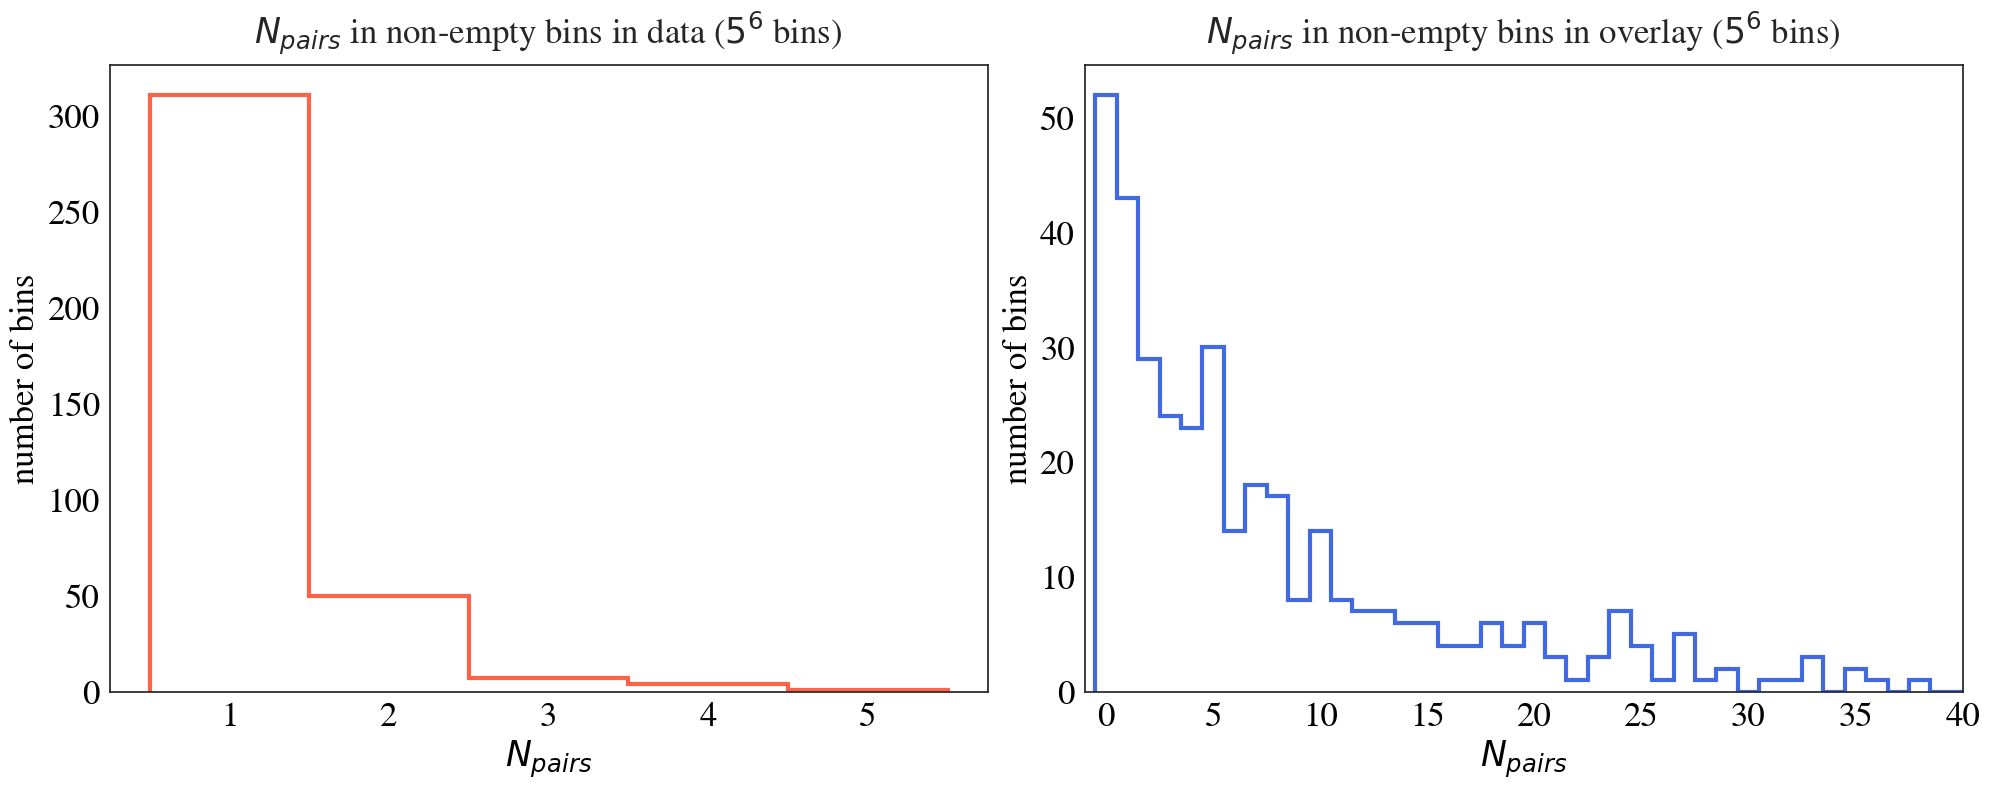

In [24]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,2,1)
plot_discrete_histogram(data=Ndata_in_bin_array,histtype='step',linewidth=3,color=Colors['beam on'])
set_axes(ax,r'$N_{pairs}$','number of bins',do_add_legend=True,title=r'$N_{pairs}$ in non-empty bins in data ($5^6$ bins)')

ax=fig.add_subplot(1,2,2)
plot_discrete_histogram(data=Nmc_all_cuts_in_bin_array,histtype='step',linewidth=3,color='royalblue',label='detector+kinematical cuts')
set_axes(ax,r'$N_{pairs}$','number of bins',do_add_legend=False,title=r'$N_{pairs}$ in non-empty bins in overlay ($5^6$ bins)',xlim=(-1,40))

plt.tight_layout()
save_figure(figures_path + 'Npairs_in_6d_bins.pdf')

# events in 3D bins

In [31]:
def get_sam_in_muon_bin(sam
                   ,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,Pmu_phi_min,Pmu_phi_max):
    return sam[ (Pmu_min<sam['reco_Pmu_mcs'])
                                             &(sam['reco_Pmu_mcs']<Pmu_max)
                                             &(Pmu_cos_theta_min<sam['reco_Pmu_cos_theta'])
                                             &(sam['reco_Pmu_cos_theta']<Pmu_cos_theta_max)
                                             &(Pmu_phi_min<180./np.pi*sam['reco_Pmu_mcs_phi'])
                                             &(180./np.pi*sam['reco_Pmu_mcs_phi']<Pmu_phi_max)
                                            ]

def get_sam_in_proton_bin(sam
                   ,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,Pp_phi_min,Pp_phi_max):
    return sam[ (Pp_min<sam['reco_Pp'])
                                             &(sam['reco_Pp']<Pp_max)
                                             &(Pp_cos_theta_min<sam['reco_Pp_cos_theta'])
                                             &(sam['reco_Pp_cos_theta']<Pp_cos_theta_max)
                                             &(Pp_phi_min<180./np.pi*sam['reco_Pp_phi'])
                                             &(180./np.pi*sam['reco_Pp_phi']<Pp_phi_max)
                                            ]

def create_table_of_events_in_muon_bins(sam_data=None,sam_mc_all_cuts=None,NBins=5):
    for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)

    Ndata_in_bin_array,Nmc_all_cuts_in_bin_array = [],[]
    for i_Pmu in range(len(Bins['Pmu'][:-1])):
        Pmu_min,Pmu_max = Bins['Pmu'][i_Pmu],Bins['Pmu'][i_Pmu+1]
        
        for i_Pmu_cos_theta in range(len(Bins['cos(theta(mu))'][:-1])):
            Pmu_cos_theta_min,Pmu_cos_theta_max = Bins['cos(theta(mu))'][i_Pmu_cos_theta],Bins['cos(theta(mu))'][i_Pmu_cos_theta+1]

            for i_Pmu_phi in range(len(Bins['phi(mu)'][:-1])):
                Pmu_phi_min,Pmu_phi_max = Bins['phi(mu)'][i_Pmu_phi],Bins['phi(mu)'][i_Pmu_phi+1]                
                data_in_bin = get_sam_in_muon_bin(sam_data                                                          
                                                  ,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,Pmu_phi_min,Pmu_phi_max)                
                mc_all_cuts = get_sam_in_muon_bin(sam_mc_all_cuts
                                                  ,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,Pmu_phi_min,Pmu_phi_max)                
                if len(data_in_bin)>0:
                    Ndata_in_bin_array.append(len(data_in_bin))
                    Nmc_all_cuts_in_bin_array.append(len(mc_all_cuts))
    print 'done.'
    return np.array(Ndata_in_bin_array),np.array(Nmc_all_cuts_in_bin_array)

def create_table_of_events_in_proton_bins(sam_data=None,sam_mc_all_cuts=None,NBins=5):
    for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)

    Ndata_in_bin_array,Nmc_all_cuts_in_bin_array = [],[]
    for i_Pp in range(len(Bins['Pp'][:-1])):
        Pp_min,Pp_max = Bins['Pp'][i_Pp],Bins['Pp'][i_Pp+1]
        for i_Pp_cos_theta in range(len(Bins['cos(theta(p))'][:-1])):
            Pp_cos_theta_min,Pp_cos_theta_max = Bins['cos(theta(p))'][i_Pp_cos_theta],Bins['cos(theta(p))'][i_Pp_cos_theta+1]
            for i_Pp_phi in range(len(Bins['phi(p)'][:-1])):
                Pp_phi_min,Pp_phi_max = Bins['phi(p)'][i_Pp_phi],Bins['phi(p)'][i_Pp_phi+1]
                
                data_in_bin = get_sam_in_proton_bin(sam_data
                                                    ,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,Pp_phi_min,Pp_phi_max)
                mc_all_cuts = get_sam_in_proton_bin(sam_mc_all_cuts
                                                             ,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,Pp_phi_min,Pp_phi_max)
                if len(data_in_bin)>0:
                    Ndata_in_bin_array.append(len(data_in_bin))
                    Nmc_all_cuts_in_bin_array.append(len(mc_all_cuts))
    print 'done.'
    return np.array(Ndata_in_bin_array),np.array(Nmc_all_cuts_in_bin_array)

In [32]:
Ndata_in_muon_bins,Nmc_all_cuts_in_muon_bins = create_table_of_events_in_muon_bins(sam_data=selected_beam_on
                                                                                                             ,sam_mc_all_cuts=selected_CC1p)
Ndata_in_proton_bins,Nmc_all_cuts_in_proton_bins = create_table_of_events_in_proton_bins(sam_data=selected_beam_on
                                                                                                             ,sam_mc_all_cuts=selected_CC1p)

done.
done.


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/Xsec_extraction/Npairs_in_3d_bins.pdf


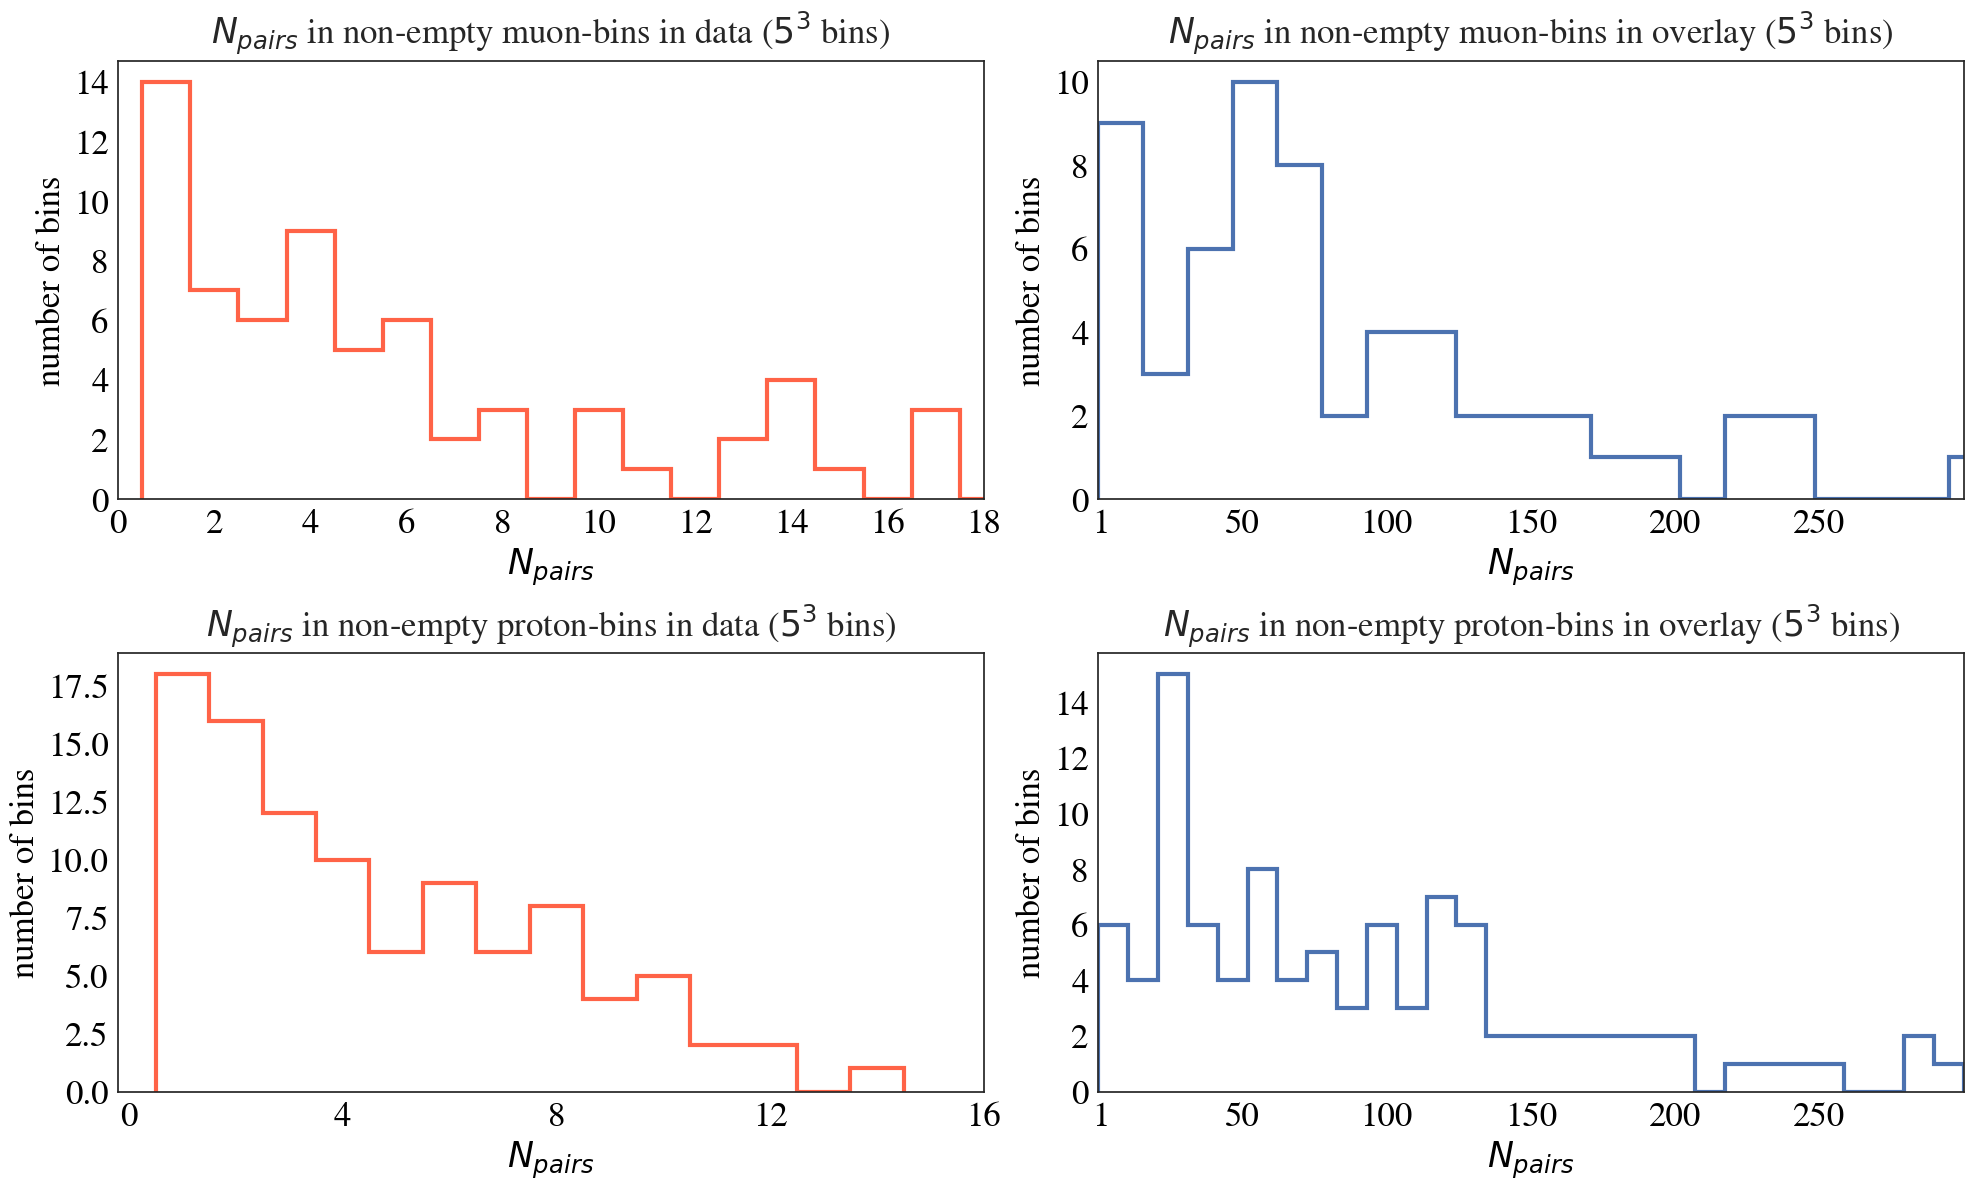

In [35]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,2,1)
plot_discrete_histogram(data=Ndata_in_muon_bins,histtype='step',linewidth=3,color=Colors['beam on'])
set_axes(ax,r'$N_{pairs}$','number of bins',do_add_legend=False,do_add_grid=False,title=r'$N_{pairs}$ in non-empty muon-bins in data ($5^3$ bins)',xlim=(0,18))

ax=fig.add_subplot(2,2,2)
plt.hist(Nmc_all_cuts_in_muon_bins,bins=linspace(0,450,30),label='detector+kinematical cuts',histtype='step',linewidth=3);
set_axes(ax,r'$N_{pairs}$','number of bins',do_add_legend=False,title=r'$N_{pairs}$ in non-empty muon-bins in overlay ($5^3$ bins)'
        ,xlim=(0,300),xticks=[1,50,100,150,200,250])

ax=fig.add_subplot(2,2,3)
plot_discrete_histogram(data=Ndata_in_proton_bins,histtype='step',linewidth=3,color=Colors['beam on'])
set_axes(ax,r'$N_{pairs}$','number of bins',do_add_legend=False,title=r'$N_{pairs}$ in non-empty proton-bins in data ($5^3$ bins)'
         ,xticks=[0,4,8,12,16])

ax=fig.add_subplot(2,2,4)
plt.hist(Nmc_all_cuts_in_proton_bins,bins=linspace(0,300,30),label='detector+kinematical cuts',histtype='step',linewidth=3);
set_axes(ax,r'$N_{pairs}$','number of bins',do_add_legend=False,title=r'$N_{pairs}$ in non-empty proton-bins in overlay ($5^3$ bins)'
         ,xlim=(0,300),xticks=[1,50,100,150,200,250])

plt.tight_layout()
save_figure(figures_path + 'Npairs_in_3d_bins.pdf')

In [37]:
print np.mean(Nmc_all_cuts_in_muon_bins),'in muon bins'
print np.mean(Nmc_all_cuts_in_proton_bins),'in proton bins'

132.728571429 in muon bins
93.6868686869 in proton bins
